<a href="https://colab.research.google.com/github/cathyai0320/A.I./blob/main/Team_TL%3BDR_STEM_Competition_Pancreas_Cancer_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What Are Cancer Biomarkers**

Cancer biomarkers are biological molecules produced by the body or tumor in a person with cancer. Biomarker testing helps characterize alterations in the tumor. Biomarkers can be DNA, RNA, protein or metabolomic profiles that are specific to the tumor. Testing can include genomic testing to look at the DNA sequence, DNA or RNA tests to look for gene fusions, or tests to measure RNA or protein levels.

Biomarkers can be used for several purposes:

*   Assess an individual’s risk of developing cancer
*   Determine an individual’s risk of cancer recurrence
* Predict the likelihood that a given therapy will work for a specific patient
* Monitor a disease’s progression to determine if a therapy is working

**Trefoil factor 1 (TFF1)** is a potential prognostic biomarker with functional significance in breast cancers. Trefoil factors share a lectin activity that defines their role in mucus. The data demonstrate the production of TFF3 in synovial membrane. Unexpectedly, synovial fluid contains all three known TFF peptides

**LYVE1** is a type I integral membrane glycoprotein. It acts as a receptor and binds to both soluble and immobilized hyaluronan. This protein may function in lymphatic hyaluronan transport and have a role in tumor metastasis.[6] LYVE-1 is a cell surface receptor on lymphatic endothelial cells that can be used as a lymphatic endothelial cell marker, allowing for the isolation of these cells for experimental purposes. The physiological role for this receptor is still the subject of debate, but evolutionary conservation suggests an important role.

**REG1B** gene is a type I subclass member of the Reg gene family. The Reg gene family is a multigene family grouped into four subclasses, types I, II, III and IV based on the primary structures of the encoded proteins. This gene encodes a protein that is secreted by the exocrine pancreas. It is associated with islet cell regeneration and diabetogenesis and may be involved in pancreatic lithogenesis. Reg family members REG1A, REGL, PAP and this gene are tandemly clustered on chromosome 2p12 and may have arisen from the same ancestral gene by gene duplication

**REG1A** Pancreatic Stone Protein (PSP), also known as Lithostathine-1-alpha islet cells regeneration factor (ICRF) or islet of Langerhans regenerating protein (REG) is a protein that in humans is encoded by the REG1A gene as a single polypeptide of 144 amino acids further cleaved by trypsin to produce a 133 amino acid protein that is O-linked glycosylated on threonine 27. This protein is a type I subclass member of the Regenerating protein family. The blood PSP concentration has been shown to increase substantially in response to a sepsis event. Consequently, the use of the PSP as a biomarker of sepsis has been investigated thoroughly and the result of these researches confirmed the high diagnostic accuracy of the PSP for sepsis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate
from PIL import Image

In [ ]:
data = pd.read_excel("/content/a combination of urinary biomarker.xlsx")

In [ ]:
data.head()

,Sample ID,Patient's Cohort,Sample Origin,Age,Sex,"Diagnosis (1=Control, 2=Benign, 3=PDAC)",Stage,Benign Samples Diagnosis,Plasma CA19-9 U/ml,Creatinine mg/ml,LYVE1 ng/ml,REG1B ng/ml,TFF1 ng/ml,REG1A ng/ml
0,S1,Cohort1,BPTB,33.0,F,1.0,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81.0,F,1.0,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51.0,M,1.0,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61.0,M,1.0,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62.0,M,1.0,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [ ]:
print(data.columns)

Index(['Sample ID', 'Patient's Cohort', 'Sample Origin', 'Age', 'Sex',
       'Diagnosis (1=Control, 2=Benign, 3=PDAC)', 'Stage',
       'Benign Samples Diagnosis', 'Plasma CA19-9 U/ml', 'Creatinine mg/ml',
       'LYVE1 ng/ml', 'REG1B ng/ml', 'TFF1 ng/ml', 'REG1A ng/ml'],
      dtype='object')


**Data Renaming**
* Diagnosis (1=Control, 2=Benign, 3=PDAC) = Diagnosis
* Plasma CA19-9 U/ml = Plasma
* Creatinine mg/ml = Creatinine
* LYVE1 ng/ml = LYVE1
* REG1B ng/ml = REG1B
* TFF1 ng/ml  = TFF1
* REG1A ng/ml = REG1A

In [ ]:
data.rename(columns={"Diagnosis (1=Control, 2=Benign, 3=PDAC)": "Diagnosis",
                     "Plasma CA19-9 U/ml":"Plasma",
                     "Creatinine mg/ml":"Creatinine",
                     "LYVE1 ng/ml":"LYVE1",
                     "REG1B ng/ml":"REG1B",
                     "TFF1 ng/ml":"TFF1",
                     "REG1A ng/ml":"REG1A"
                     }, inplace=True)

In [ ]:
#Checking the missing values
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':round(miss_val/len(data),2)*100})

,Missing Values,Percent
Stage,397,67.0
Benign Samples Diagnosis,388,65.0
REG1A,290,49.0
Plasma,246,41.0
Patient's Cohort,6,1.0
Sample Origin,6,1.0
Age,6,1.0
Sex,6,1.0
Diagnosis,6,1.0
Creatinine,6,1.0


<Axes: >

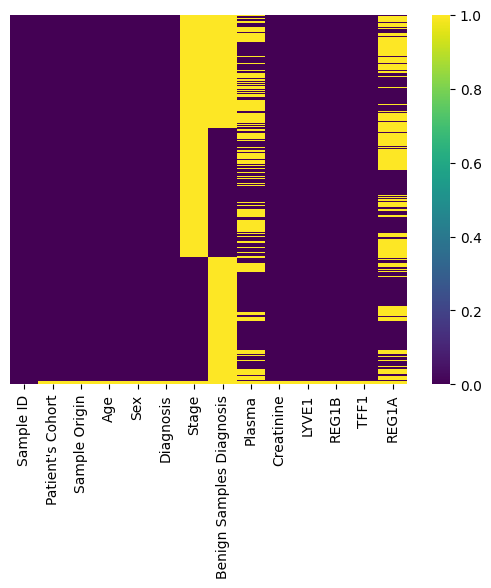

In [ ]:
sns.heatmap(data.isna(), cmap='viridis', yticklabels=False)

The features with the high missing values will be investigated and will be filled if any logical explanation is found. (For example; "Benign Samples Diagnosis" column may be filled with the "Diagnosis" column)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sample ID                 595 non-null    object 
 1   Patient's Cohort          590 non-null    object 
 2   Sample Origin             590 non-null    object 
 3   Age                       590 non-null    float64
 4   Sex                       590 non-null    object 
 5   Diagnosis                 590 non-null    float64
 6   Stage                     199 non-null    object 
 7   Benign Samples Diagnosis  208 non-null    object 
 8   Plasma                    350 non-null    float64
 9   Creatinine                590 non-null    float64
 10  LYVE1                     590 non-null    float64
 11  REG1B                     590 non-null    float64
 12  TFF1                      590 non-null    float64
 13  REG1A                     306 non-null    float64
dtypes: float64

In [ ]:
round(data.describe(),2)

,Age,Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.00,590.00,350.00,590.00,590.00,590.00,590.00,306.00
mean,59.08,2.03,654.00,0.86,3.06,111.77,597.87,735.28
std,13.11,0.80,2430.32,0.64,3.44,196.27,1010.48,1477.25
min,26.00,1.00,0.00,0.06,0.00,0.00,0.01,0.00
25%,50.00,1.00,8.00,0.37,0.17,10.76,43.96,80.69
50%,60.00,2.00,26.50,0.72,1.65,34.30,259.87,208.54
75%,69.00,3.00,294.00,1.14,5.21,122.74,742.74,649.00
max,89.00,3.00,31000.00,4.12,23.89,1403.90,13344.30,13200.00


There may be outliers in some features such as Plasma CA19-9, REG1B, TFF1, REG1A

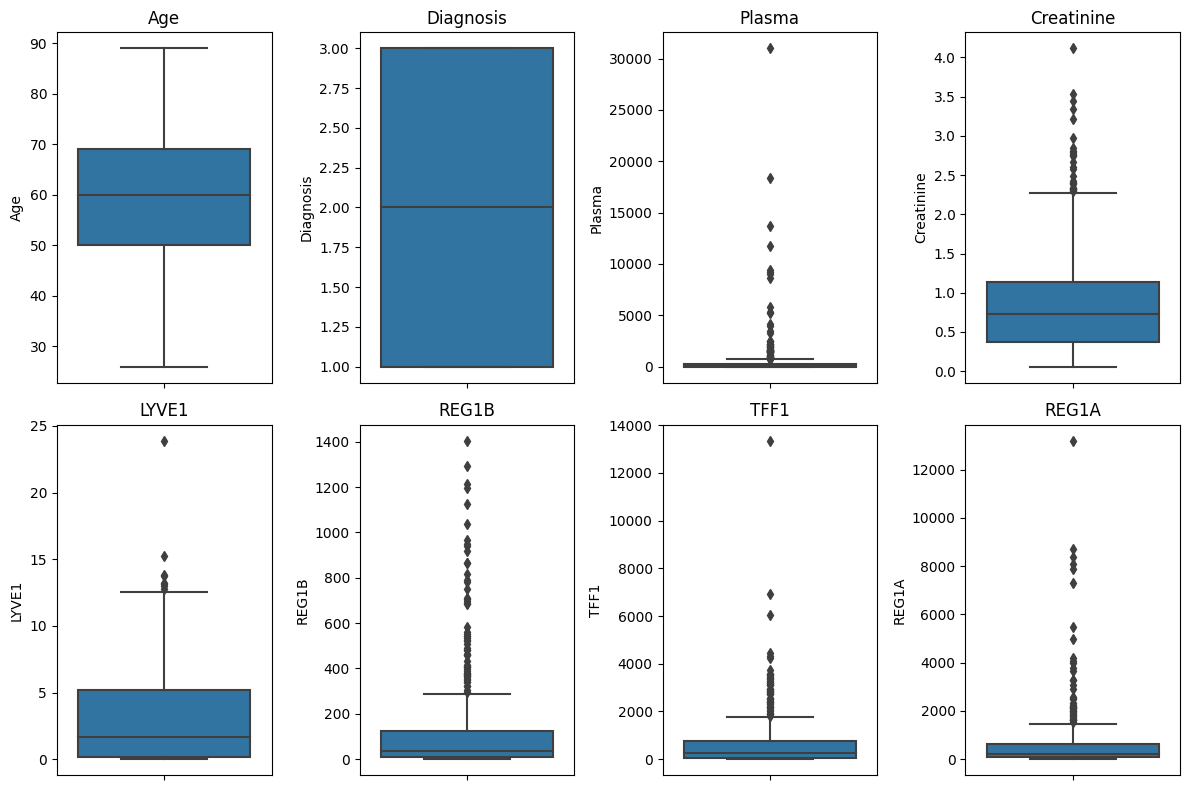

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column and create a boxplot in the respective subplot
for i, column in enumerate(data.select_dtypes(include='number').columns):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the boxplot
plt.show()

#fig.savefig('boxplot.png', format='png', dpi=300)

In [ ]:
data['Diagnosis'].value_counts()

2.0    208
3.0    199
1.0    183
Name: Diagnosis, dtype: int64

In [ ]:
data[data['Sample ID'].isna()==True]

,Sample ID,Patient's Cohort,Sample Origin,Age,Sex,Diagnosis,Stage,Benign Samples Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A
590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


590th observations will be removed. There are no any information

In [ ]:
data[data['Age'].isna() == True]

,Sample ID,Patient's Cohort,Sample Origin,Age,Sex,Diagnosis,Stage,Benign Samples Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A
590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,"BPTB, Barts Pancreas Tissue Bank, London, UK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,"ESP, Spanish National Cancer Research Centre, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,"LIV, Liverpool University, UK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,"UCL, University College London, UK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,"Cohort 1, previously used samples; Cohort 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 6 observations above also can be removed

In [ ]:
data = data[data['Sample ID'].isna() == False]

In [ ]:
[value for value in data['Sample ID'] if (value != np.nan) & (value[0] !="S")]

['BPTB, Barts Pancreas Tissue Bank, London, UK',
 'ESP, Spanish National Cancer Research Centre, Madrid, Spain ',
 'LIV, Liverpool University, UK',
 'UCL, University College London, UK',
 'Cohort 1,  previously used samples; Cohort 2, newly added samples']

Only the observations above have the different "Sample ID" then the others. We will already remove these rows because there are no other values for them except "Sample ID"

In [ ]:
data.drop(data[data['Age'].isna()==True].index, axis =0, inplace = True)

In [ ]:
#Checking the missing values
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent
Stage,391,66.271186
Benign Samples Diagnosis,382,64.745763
REG1A,284,48.135593
Plasma,240,40.677966


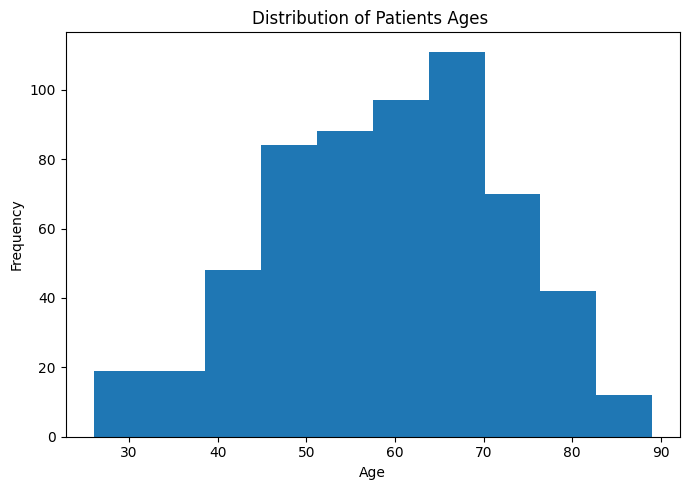

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(data["Age"], bins = 10)
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.title("Distribution of Patients Ages ")
plt.tight_layout()
plt.show()

fig.savefig('age_histv2.png', format='png', dpi=300)

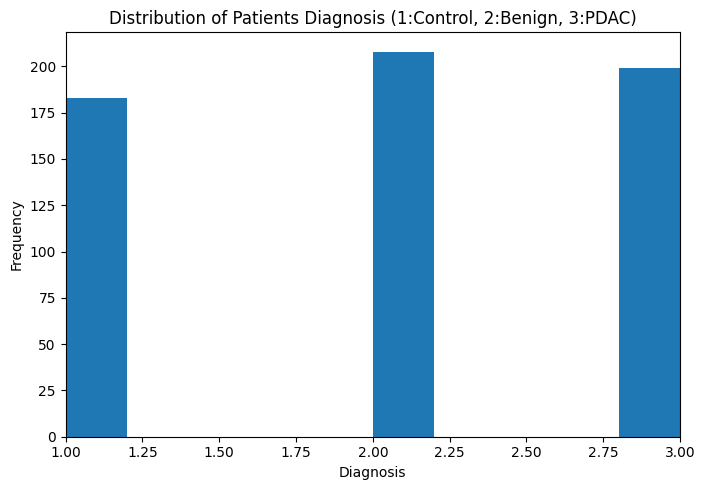

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(data["Diagnosis"])
plt.ylabel("Frequency")
plt.xlabel("Diagnosis")
plt.title("Distribution of Patients Diagnosis (1:Control, 2:Benign, 3:PDAC)")
plt.tight_layout()
plt.xlim(1,3)
plt.show()

fig.savefig('diagnosisv2.png', format='png', dpi=300)

In [ ]:
pd_deneme = pd.DataFrame(data["Stage"].value_counts())
pd_deneme

,Stage
III,76
IIB,68
IV,21
IB,12
IIA,11
II,7
IA,3
I,1


In [ ]:
df_data = {'Stage': ['III', 'IIB', 'IV', 'IB', 'IIA', 'II', 'IA', 'I'],
        'Count': [76, 68, 21, 12, 11, 7, 3, 1]}
df = pd.DataFrame(df_data)

stage_order = ['I', 'IA', 'IB', 'II', 'IIA', 'IIB', 'III', 'IV']
df['Stage'] = pd.Categorical(df['Stage'], categories=stage_order, ordered=True)
df.sort_values('Stage', inplace=True)


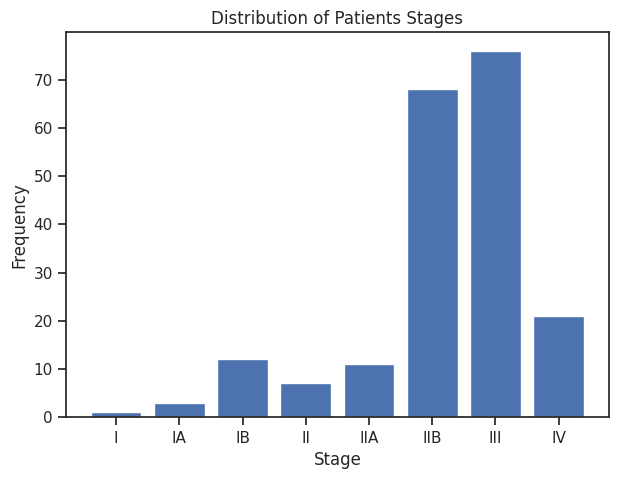

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.bar(df['Stage'], df['Count'])
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Distribution of Patients Stages')
plt.show()

fig.savefig('stage_histv2.png', format='png', dpi=300)

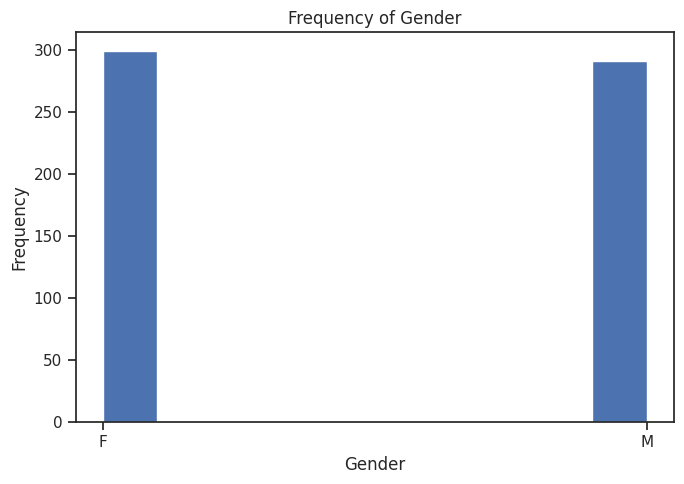

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(data["Sex"])
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.title("Frequency of Gender")
plt.tight_layout()
plt.show()

fig.savefig('gender_histv2.png', format='png', dpi=300)

In [ ]:
data["Sex"].value_counts()

F    299
M    291
Name: Sex, dtype: int64

In [ ]:
data["age_bins"]=pd.cut(data["Age"], [20,30,40,50,60,70,80,90],labels=["20-30","31-40","41-50","51-60","61-70","71-80","81-90"])

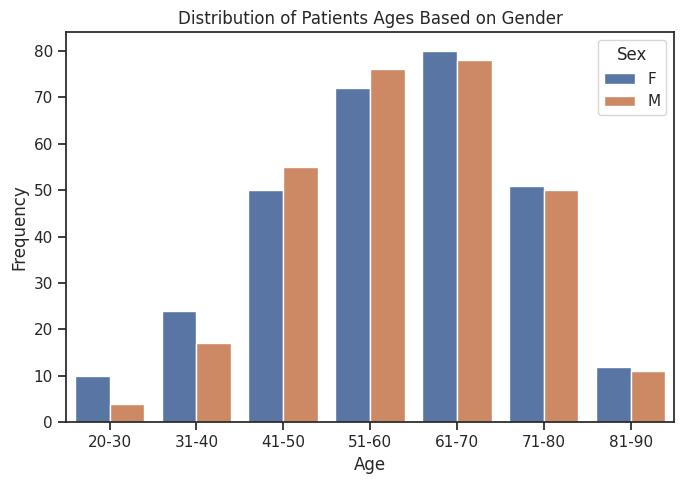

In [ ]:
fig = plt.figure(figsize=(7,5))
sns.countplot(data=data, x="age_bins", hue="Sex")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.title("Distribution of Patients Ages Based on Gender")
plt.tight_layout()
plt.show()

fig.savefig('age_gender_histv2.png', format='png', dpi=300)

There is a bell shape distribution in Age.

Gender also have balanced distribution based on the Age

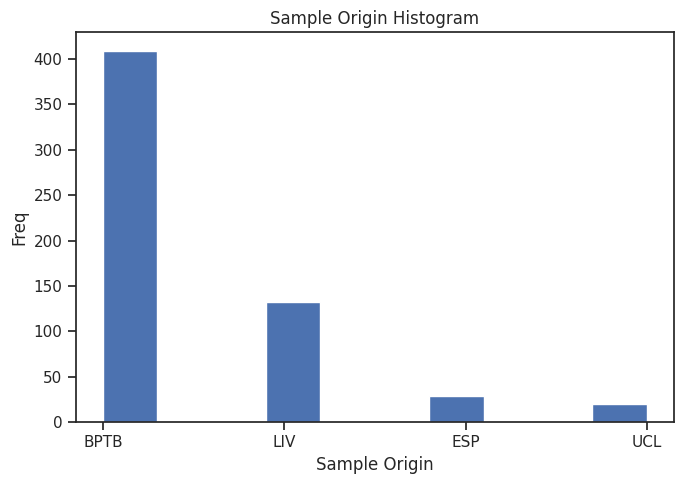

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(data["Sample Origin"])
plt.ylabel("Freq")
plt.xlabel("Sample Origin")
plt.title("Sample Origin Histogram")
plt.tight_layout()
plt.show()

#fig.savefig('sample_origin.png', format='png', dpi=300)

The abbreviations refer to the institutions where the data coming from. It is not clearly stated in the research paper, but most likely they stands for as follows;

**BPTB:** Barts Pancreas Tissue Bank

**LIV:** University of Liverpool

**ESP:** Spanish National Cancer Research Center

**UCL:** University College London

The corresponsing part of the article is "Clinical specimens were obtained from multiple centres: Barts Pancreas Tissue Bank, Uni-
versity College London, University of Liverpool, Spanish National Cancer Research Center, Cambridge University Hospital, and University of Belgrade."

In [ ]:
data["Stage"].unique()

array([nan, 'I', 'IA', 'IB', 'II', 'IIA', 'IIB', 'III', 'IV'],
      dtype=object)

In [ ]:
data["Benign Samples Diagnosis"].value_counts()

Pancreatitis                                                    41
Pancreatitis (Chronic)                                          35
Gallstones                                                      21
Pancreatitis (Alcohol-Chronic)                                  11
Cholecystitis                                                    9
Serous cystadenoma - NOS                                         7
Choledocholiathiasis                                             6
Abdominal Pain                                                   6
Pancreatitis (Idiopathic)                                        4
Pancreatitis (Alcohol-Chronic-Pseuodcyst)                        4
Pancreatitis (Gallstone)                                         4
Pancreatitis (Pseudocyst)                                        4
Premalignant lesions-Mucinous cystadenoma-NOS                    3
Pancreatitis (Autoimmune)                                        3
Serous microcystic adenoma                                    

Benign Samples Diagnosis column can be grouped and another column can be created. For example maybe all values that has "Pancreatitis" can be one group, "Gallstones" can be another etc.

In [ ]:
display(data[data["Benign Samples Diagnosis"].isna()==False]["Diagnosis"].value_counts(),
data[data["Benign Samples Diagnosis"].isna()==True]["Diagnosis"].value_counts())

2.0    208
Name: Diagnosis, dtype: int64

3.0    199
1.0    183
Name: Diagnosis, dtype: int64

The missing values in "Benign Samples Diagnosis" is due to their diagnosis are not benign. Therefore, they can be filled as "Not benign"

In [ ]:
data["Benign Samples Diagnosis"].fillna("Not Benign", inplace=True)

In [ ]:
#Checking the missing values
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent
Stage,391,66.271186
REG1A,284,48.135593
Plasma,240,40.677966


In [ ]:
data["Stage"].value_counts()

III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: Stage, dtype: int64

In [ ]:
data.head()

,Sample ID,Patient's Cohort,Sample Origin,Age,Sex,Diagnosis,Stage,Benign Samples Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,age_bins
0,S1,Cohort1,BPTB,33.0,F,1.0,NaN,Not Benign,11.7,1.83222,0.893219,52.94884,654.282174,1262.000,31-40
1,S10,Cohort1,BPTB,81.0,F,1.0,NaN,Not Benign,NaN,0.97266,2.037585,94.46703,209.488250,228.407,81-90
2,S100,Cohort2,BPTB,51.0,M,1.0,NaN,Not Benign,7.0,0.78039,0.145589,102.36600,461.141000,NaN,51-60
3,S101,Cohort2,BPTB,61.0,M,1.0,NaN,Not Benign,8.0,0.70122,0.002805,60.57900,142.950000,NaN,61-70
4,S102,Cohort2,BPTB,62.0,M,1.0,NaN,Not Benign,9.0,0.21489,0.000860,65.54000,41.088000,NaN,61-70


In [ ]:
data["Diagnosis"].value_counts()

2.0    208
3.0    199
1.0    183
Name: Diagnosis, dtype: int64

**Patient Groups**

183 patients from control group who had no known pancreatic conditions or malignancies or history of renal diseases at the time of collection.

208 were from patients with benign hepato-biliary diseases (benign group)

199 were from PDAC patients

All samples were collected
before surgery or chemotherapeutic treatment and were age- and sex-matched wherever possi-
ble.

In [ ]:
#data.drop('PDAC_target', axis=1, inplace=True)
data.loc[(data['Diagnosis']== 3),'PDAC_target'] = 1
data.loc[(data['Diagnosis']!= 3),'PDAC_target'] = 0

In [ ]:
data.head()

,Sample ID,Patient's Cohort,Sample Origin,Age,Sex,Diagnosis,Stage,Benign Samples Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,age_bins,PDAC_target
0,S1,Cohort1,BPTB,33.0,F,1.0,NaN,Not Benign,11.7,1.83222,0.893219,52.94884,654.282174,1262.000,31-40,0.0
1,S10,Cohort1,BPTB,81.0,F,1.0,NaN,Not Benign,NaN,0.97266,2.037585,94.46703,209.488250,228.407,81-90,0.0
2,S100,Cohort2,BPTB,51.0,M,1.0,NaN,Not Benign,7.0,0.78039,0.145589,102.36600,461.141000,NaN,51-60,0.0
3,S101,Cohort2,BPTB,61.0,M,1.0,NaN,Not Benign,8.0,0.70122,0.002805,60.57900,142.950000,NaN,61-70,0.0
4,S102,Cohort2,BPTB,62.0,M,1.0,NaN,Not Benign,9.0,0.21489,0.000860,65.54000,41.088000,NaN,61-70,0.0


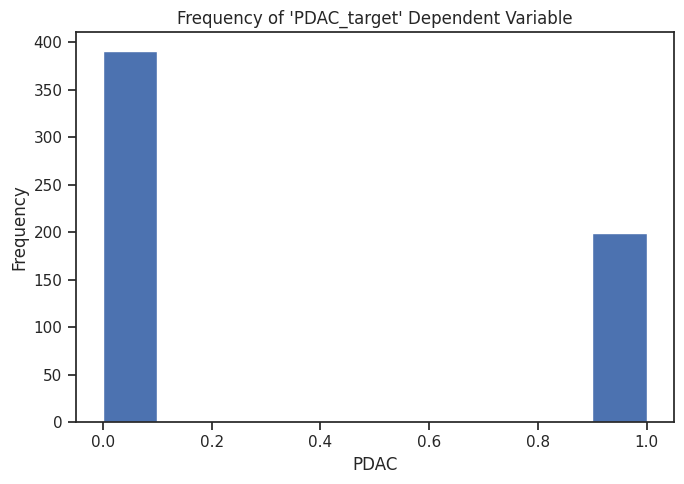

In [ ]:
fig = plt.figure(figsize=(7,5))
plt.hist(data["PDAC_target"])
plt.ylabel("Frequency")
plt.xlabel("PDAC")
plt.title("Frequency of 'PDAC_target' Dependent Variable")
plt.tight_layout()
plt.show()

fig.savefig('pdac_targetv2.png', format='png', dpi=300)

In [ ]:
data['PDAC_target'].value_counts()

0.0    391
1.0    199
Name: PDAC_target, dtype: int64

In [ ]:
data['Stage'].fillna("OK", inplace=True)

In [ ]:
#Checking the missing values
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent
REG1A,284,48.135593
Plasma,240,40.677966


In [ ]:
#KNN Imputer
imputer = KNNImputer(weights='distance')

In [ ]:
imputed_data = data.copy()

In [ ]:
data.columns

Index(['Sample ID', 'Patient's Cohort', 'Sample Origin', 'Age', 'Sex',
       'Diagnosis', 'Stage', 'Benign Samples Diagnosis', 'Plasma',
       'Creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A', 'age_bins',
       'PDAC_target'],
      dtype='object')

In [ ]:
imputed_data.select_dtypes(include='number').columns

Index(['Age', 'Diagnosis', 'Plasma', 'Creatinine', 'LYVE1', 'REG1B', 'TFF1',
       'REG1A', 'PDAC_target'],
      dtype='object')

In [ ]:
imputed_data.select_dtypes(include='object').columns

Index(['Sample ID', 'Patient's Cohort', 'Sample Origin', 'Sex', 'Stage',
       'Benign Samples Diagnosis'],
      dtype='object')

In [ ]:
data.select_dtypes(include='category').columns

Index(['age_bins'], dtype='object')

In [ ]:
imputed_data_numeric = data.select_dtypes(include='number')

NameError: ignored

In [ ]:
imputed_data_object = data.select_dtypes(include='object')

In [ ]:
imputed_data_categorical =data.select_dtypes(include='category')

In [ ]:
imputed_data_numeric = pd.DataFrame(imputer.fit_transform(imputed_data_numeric), columns=imputed_data_numeric.columns)

In [ ]:
imputed_data = pd.concat([imputed_data_numeric, imputed_data_object,imputed_data_categorical], axis=1)

In [ ]:
data.select_dtypes(include='category').columns

Index(['age_bins'], dtype='object')

In [ ]:
imputed_data.head()

,Age,Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,PDAC_target,Sample ID,Patient's Cohort,Sample Origin,Sex,Stage,Benign Samples Diagnosis,age_bins
0,33.0,1.0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0.0,S1,Cohort1,BPTB,F,OK,Not Benign,31-40
1,81.0,1.0,1204.171883,0.97266,2.037585,94.46703,209.488250,228.407000,0.0,S10,Cohort1,BPTB,F,OK,Not Benign,81-90
2,51.0,1.0,7.000000,0.78039,0.145589,102.36600,461.141000,196.939506,0.0,S100,Cohort2,BPTB,M,OK,Not Benign,51-60
3,61.0,1.0,8.000000,0.70122,0.002805,60.57900,142.950000,177.046199,0.0,S101,Cohort2,BPTB,M,OK,Not Benign,61-70
4,62.0,1.0,9.000000,0.21489,0.000860,65.54000,41.088000,224.079850,0.0,S102,Cohort2,BPTB,M,OK,Not Benign,61-70


In [ ]:
data.head()

,Sample ID,Patient's Cohort,Sample Origin,Age,Sex,Diagnosis,Stage,Benign Samples Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,age_bins,PDAC_target
0,S1,Cohort1,BPTB,33.0,F,1.0,OK,Not Benign,11.7,1.83222,0.893219,52.94884,654.282174,1262.000,31-40,0.0
1,S10,Cohort1,BPTB,81.0,F,1.0,OK,Not Benign,NaN,0.97266,2.037585,94.46703,209.488250,228.407,81-90,0.0
2,S100,Cohort2,BPTB,51.0,M,1.0,OK,Not Benign,7.0,0.78039,0.145589,102.36600,461.141000,NaN,51-60,0.0
3,S101,Cohort2,BPTB,61.0,M,1.0,OK,Not Benign,8.0,0.70122,0.002805,60.57900,142.950000,NaN,61-70,0.0
4,S102,Cohort2,BPTB,62.0,M,1.0,OK,Not Benign,9.0,0.21489,0.000860,65.54000,41.088000,NaN,61-70,0.0


In [ ]:
imputed_data.head()

,Age,Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,PDAC_target,Sample ID,Patient's Cohort,Sample Origin,Sex,Stage,Benign Samples Diagnosis,age_bins
0,33.0,1.0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0.0,S1,Cohort1,BPTB,F,OK,Not Benign,31-40
1,81.0,1.0,1204.171883,0.97266,2.037585,94.46703,209.488250,228.407000,0.0,S10,Cohort1,BPTB,F,OK,Not Benign,81-90
2,51.0,1.0,7.000000,0.78039,0.145589,102.36600,461.141000,196.939506,0.0,S100,Cohort2,BPTB,M,OK,Not Benign,51-60
3,61.0,1.0,8.000000,0.70122,0.002805,60.57900,142.950000,177.046199,0.0,S101,Cohort2,BPTB,M,OK,Not Benign,61-70
4,62.0,1.0,9.000000,0.21489,0.000860,65.54000,41.088000,224.079850,0.0,S102,Cohort2,BPTB,M,OK,Not Benign,61-70


In [ ]:
#Checking the missing values
miss_val = imputed_data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(imputed_data)*100})

,Missing Values,Percent


In [ ]:
#imputed_data.to_csv('KNNimputeddatav2.csv')

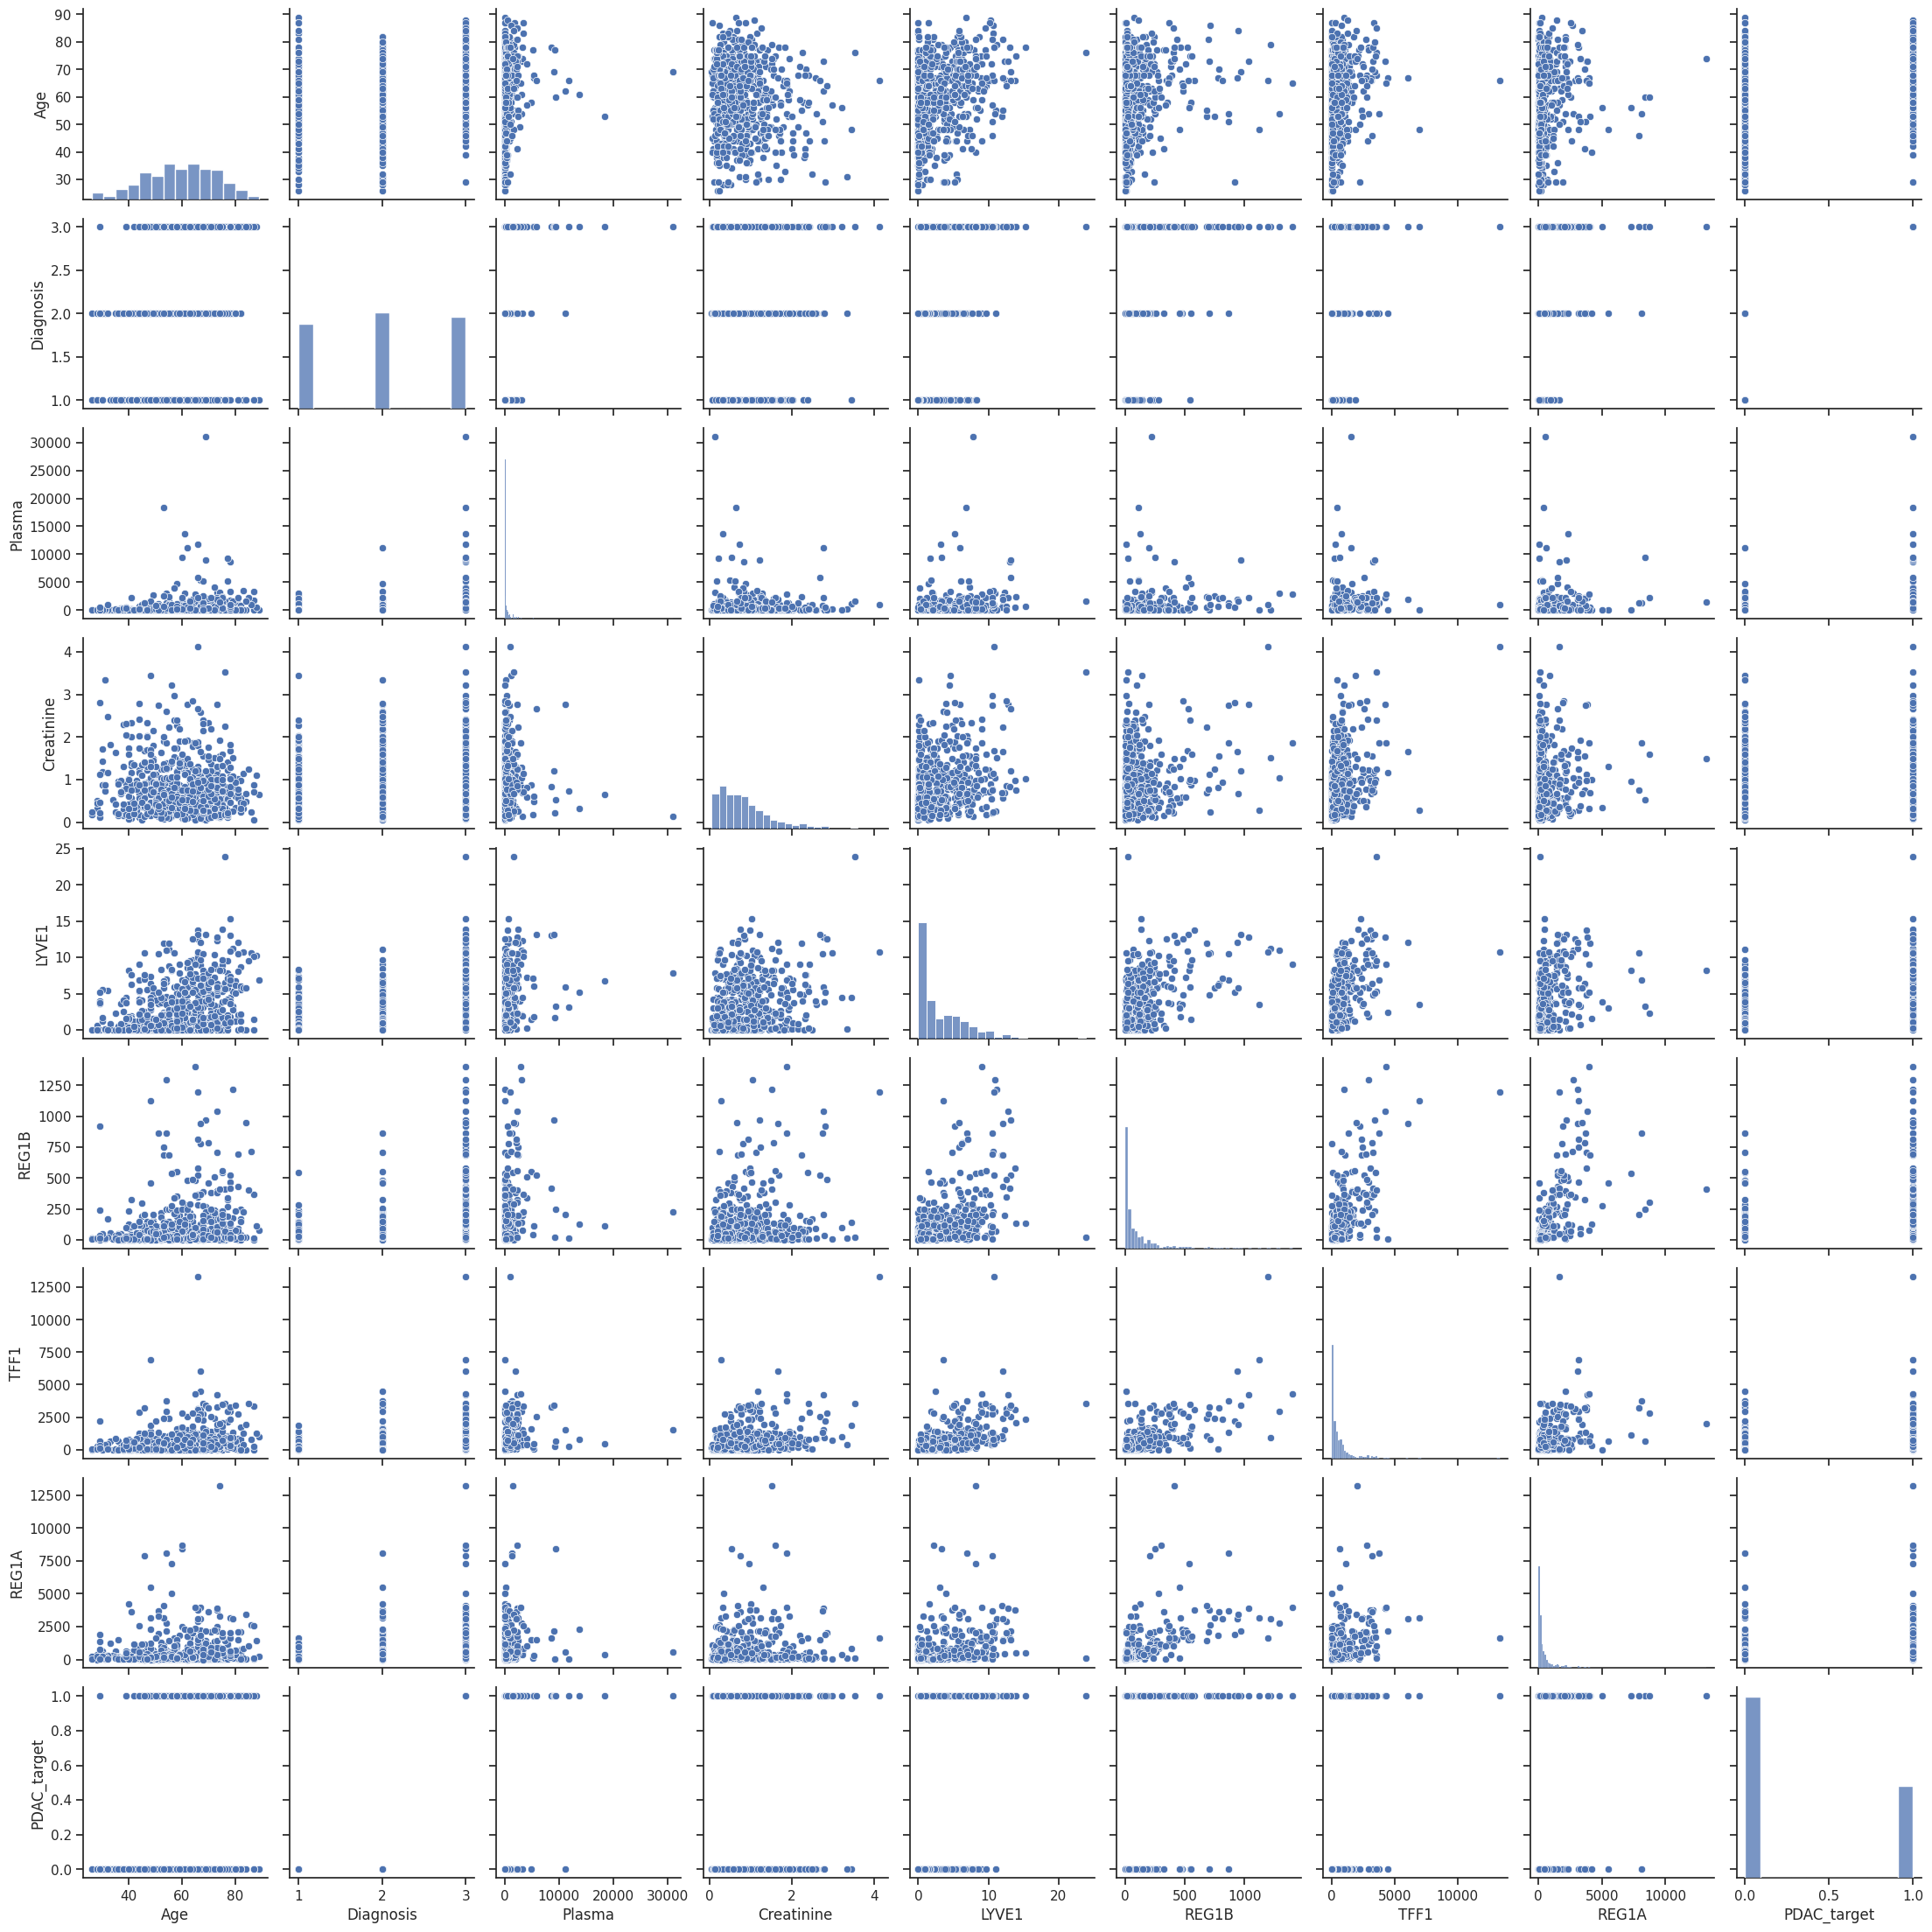

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(imputed_data)

<ipython-input-256-129d09140187>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = imputed_data_correlation.corr()


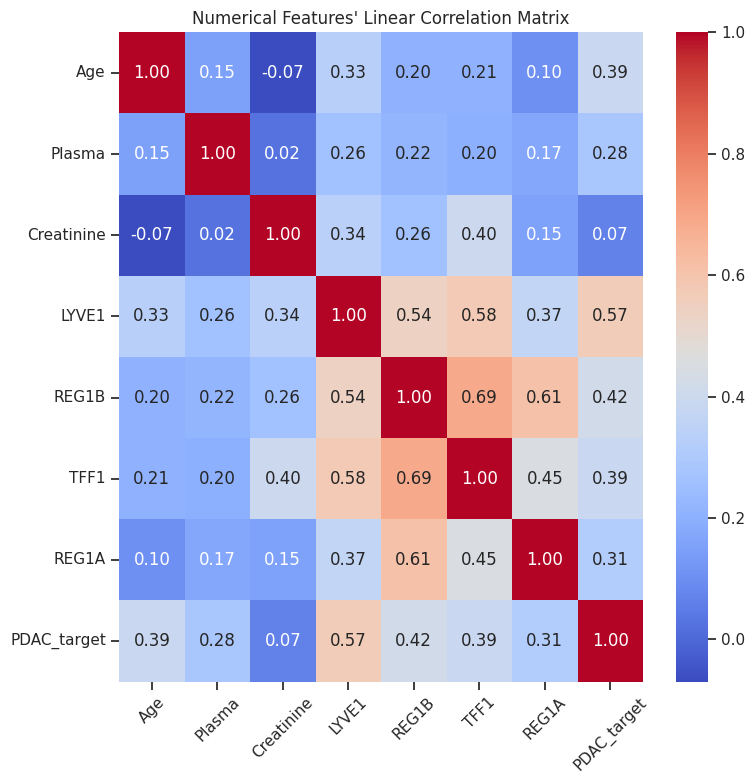

In [ ]:
imputed_data_correlation = imputed_data.drop('Diagnosis', axis = 1)
corr_matrix = imputed_data_correlation.corr()
fig=plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical Features' Linear Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

fig.savefig('correlation_heatmapv2.png', format='png', dpi=300)

In [ ]:
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)

In [ ]:
#data.to_csv('data_wo_missing.csv')

In [ ]:
imputed_data.head()

,Age,Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,PDAC_target,Sample ID,Patient's Cohort,Sample Origin,Sex,Stage,Benign Samples Diagnosis,age_bins
0,33.0,1.0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0.0,S1,Cohort1,BPTB,F,OK,Not Benign,31-40
1,81.0,1.0,1204.171883,0.97266,2.037585,94.46703,209.488250,228.407000,0.0,S10,Cohort1,BPTB,F,OK,Not Benign,81-90
2,51.0,1.0,7.000000,0.78039,0.145589,102.36600,461.141000,196.939506,0.0,S100,Cohort2,BPTB,M,OK,Not Benign,51-60
3,61.0,1.0,8.000000,0.70122,0.002805,60.57900,142.950000,177.046199,0.0,S101,Cohort2,BPTB,M,OK,Not Benign,61-70
4,62.0,1.0,9.000000,0.21489,0.000860,65.54000,41.088000,224.079850,0.0,S102,Cohort2,BPTB,M,OK,Not Benign,61-70


In [ ]:
work_data = imputed_data.copy()

In [ ]:
work_data.head()

,Age,Diagnosis,Plasma,Creatinine,LYVE1,REG1B,TFF1,REG1A,PDAC_target,Sample ID,Patient's Cohort,Sample Origin,Sex,Stage,Benign Samples Diagnosis,age_bins
0,33.0,1.0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,0.0,S1,Cohort1,BPTB,F,OK,Not Benign,31-40
1,81.0,1.0,1204.171883,0.97266,2.037585,94.46703,209.488250,228.407000,0.0,S10,Cohort1,BPTB,F,OK,Not Benign,81-90
2,51.0,1.0,7.000000,0.78039,0.145589,102.36600,461.141000,196.939506,0.0,S100,Cohort2,BPTB,M,OK,Not Benign,51-60
3,61.0,1.0,8.000000,0.70122,0.002805,60.57900,142.950000,177.046199,0.0,S101,Cohort2,BPTB,M,OK,Not Benign,61-70
4,62.0,1.0,9.000000,0.21489,0.000860,65.54000,41.088000,224.079850,0.0,S102,Cohort2,BPTB,M,OK,Not Benign,61-70


In [ ]:
features=["Sex","Plasma","Creatinine","LYVE1","REG1B","TFF1","age_bins","PDAC_target"]
work_data_features = work_data.loc[:,features]

In [ ]:
y = work_data_features["PDAC_target"]
X=work_data_features.drop("PDAC_target", axis =1)

In [ ]:
X.head()

,Sex,Plasma,Creatinine,LYVE1,REG1B,TFF1,age_bins
0,F,11.700000,1.83222,0.893219,52.94884,654.282174,31-40
1,F,1204.171883,0.97266,2.037585,94.46703,209.488250,81-90
2,M,7.000000,0.78039,0.145589,102.36600,461.141000,51-60
3,M,8.000000,0.70122,0.002805,60.57900,142.950000,61-70
4,M,9.000000,0.21489,0.000860,65.54000,41.088000,61-70


In [ ]:
X_dummies = pd.get_dummies(X)

In [ ]:
X_dummies.columns

Index(['Plasma', 'Creatinine', 'LYVE1', 'REG1B', 'TFF1', 'Sex_F', 'Sex_M',
       'age_bins_20-30', 'age_bins_31-40', 'age_bins_41-50', 'age_bins_51-60',
       'age_bins_61-70', 'age_bins_71-80', 'age_bins_81-90'],
      dtype='object')

In [ ]:

#X = work_data.loc[:,features]
#y = work_data.loc[:,"Diagnosis"]

In [ ]:
#work_data = pd.get_dummies(work_data, columns=["Sex"], prefix=['Gender'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
print("X_Train set shape: ", X_train.shape)
print("X_Test set shape: ", X_test.shape)
print("y_Train set shape: ", y_train.shape)
print("y_Test set shape: ", y_test.shape)

X_Train set shape:  (472, 14)
X_Test set shape:  (118, 14)
y_Train set shape:  (472,)
y_Test set shape:  (118,)


In [ ]:
print("female", X_test["Sex_F"].sum())
print("male", X_test["Sex_M"].sum())


female 67
male 51


### SMOTE Method

In [ ]:
oversample = SMOTE()
X_smoted_train, y_smoted_train = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_smoted_train.shape)
print(y_smoted_train.shape)
print(X_test.shape)
print(y_test.shape)

(626, 14)
(626,)
(118, 14)
(118,)


In [ ]:
df_y_train = pd.DataFrame(data=y_train, columns=['PDAC_target'])
df_y_smoted_train = pd.DataFrame(data=y_smoted_train, columns=['PDAC_target'])
df_y_test = pd.DataFrame(data=y_test, columns=['PDAC_target'])

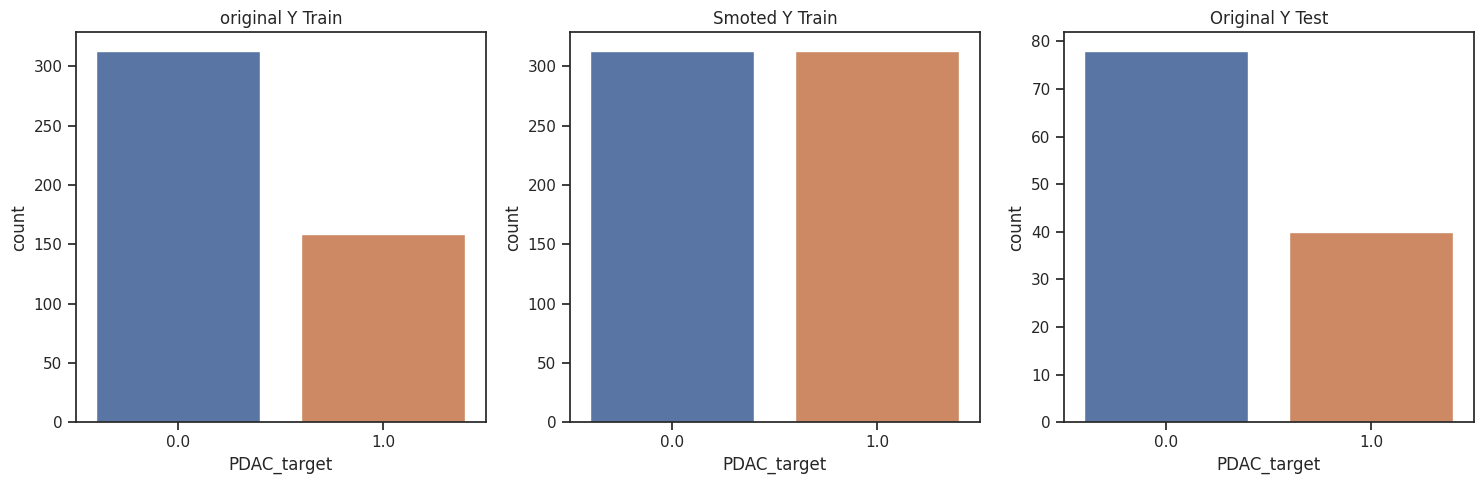

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='PDAC_target', data=df_y_train, ax=axes[0])
axes[0].set_title('original Y Train')

# Draw the second countplot
sns.countplot(x='PDAC_target', data=df_y_smoted_train, ax=axes[1])
axes[1].set_title('Smoted Y Train')

# Draw the third countplot
sns.countplot(x='PDAC_target', data=df_y_test, ax=axes[2])
axes[2].set_title('Original Y Test')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the countplots
plt.show()

fig.savefig('Smote_target_value.png', format='png', dpi=300)

# Model Building

# Decision Tree

In [ ]:
dectree_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("dectree_clf",DecisionTreeClassifier(random_state=42))
    ])

In [ ]:
parameters={'dectree_clf__min_samples_leaf':[10,20,50,150],
            'dectree_clf__criterion':('entropy', 'gini'),
            'dectree_clf__max_depth':[5,10,20,30,50,75]}
dectree_grid_pipeline=GridSearchCV(dectree_pipeline, parameters,n_jobs=-1, cv=5)
#dectree_grid_pipeline=GridSearchCV(dectree_pipeline, parameters, cv=5)
#Randomized Grid Search

In [ ]:
dectree_grid_pipeline.fit(X_smoted_train,y_smoted_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dectree_clf',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dectree_clf__criterion': ('entropy', 'gini'),
                         'dectree_clf__max_depth': [5, 10, 20, 30, 50, 75],
                         'dectree_clf__min_samples_leaf': [10, 20, 50, 150]})

In [ ]:
print("Grid Search Train Set Best Score: ", round(dectree_grid_pipeline.best_score_,2))

Grid Search Train Set Best Score:  0.83


In [ ]:
dectree_grid_pipeline.best_params_

{'dectree_clf__criterion': 'gini',
 'dectree_clf__max_depth': 5,
 'dectree_clf__min_samples_leaf': 20}

In [ ]:
grid_predictions = dectree_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[69  9]
 [ 5 35]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91        78
         1.0       0.80      0.88      0.83        40

    accuracy                           0.88       118
   macro avg       0.86      0.88      0.87       118
weighted avg       0.89      0.88      0.88       118



In [ ]:
print("AUC-ROC Test Score: ",round(roc_auc_score(y_test, dectree_grid_pipeline.predict_proba(X_test)[:,1], average='macro'),2))

AUC-ROC Test Score:  0.94


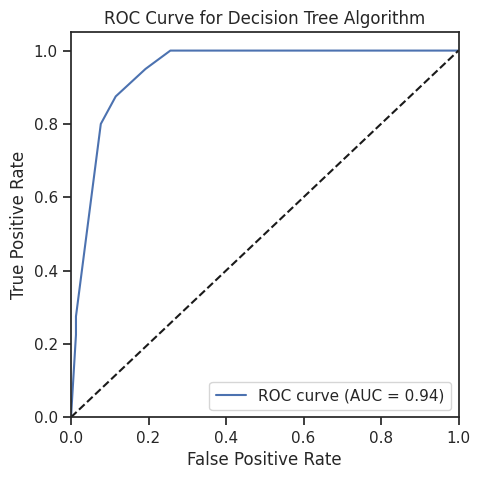

In [ ]:
y_score = dectree_grid_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig=plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Algorithm')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-Curve_DecisionTree.png', format='png', dpi=300)

In [ ]:
grid_predictions

array([1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

# Random Forest

In [ ]:
randomforest_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("randomforest_clf",RandomForestClassifier(random_state=42))
    ])

In [ ]:
parameters={'randomforest_clf__min_samples_leaf':[10,20,50,100],
            'randomforest_clf__criterion':('entropy', 'gini'),
            'randomforest_clf__max_depth':[5,10,20,30,50,75]}
randomforest_grid_pipeline=RandomizedSearchCV(randomforest_pipeline, parameters,n_jobs=-1, cv=5, n_iter=100, refit='str',random_state=42)
#randomforest_grid_pipeline=GridSearchCV(randomforest_pipeline, parameters, cv=5)
#include n_estimator to the gridsearch

In [ ]:
randomforest_grid_pipeline.fit(X_smoted_train,y_smoted_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('randomforest_clf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforest_clf__criterion': ('entropy',
                                                                        'gini'),
                                        'randomforest_clf__max_depth': [5, 10,
                                                                        20, 30,
                                                                        50,
                                                                        75],
                                        'randomforest_clf__min_samples_leaf': [10,
                                                                               20,
                                                                               50,
                                                                               100]},
                   random_state=42, refit='str')

In [ ]:
print("Grid Search Train Set Best Score: ", round(randomforest_grid_pipeline.best_score_,2))

Grid Search Train Set Best Score:  0.85


In [ ]:
randomforest_grid_pipeline.best_params_

{'randomforest_clf__min_samples_leaf': 10,
 'randomforest_clf__max_depth': 5,
 'randomforest_clf__criterion': 'entropy'}

In [ ]:
grid_predictions = randomforest_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[63 15]
 [ 4 36]]
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        78
         1.0       0.71      0.90      0.79        40

    accuracy                           0.84       118
   macro avg       0.82      0.85      0.83       118
weighted avg       0.86      0.84      0.84       118



In [ ]:
print("AUC-ROC Test Score: ",round(roc_auc_score(y_test, randomforest_grid_pipeline.predict_proba(X_test)[:,1],  average='macro'),2))

AUC-ROC Test Score:  0.95


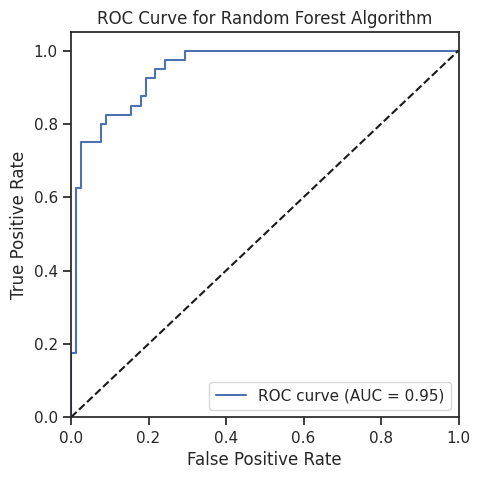

In [ ]:
y_score = randomforest_grid_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig=plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Algorithm')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-Curve_RandomForest.png', format='png', dpi=300)

# SVC

In [ ]:
svc_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("svc_clf",SVC(probability=True, random_state=42))
    ])

In [ ]:
parameters={'svc_clf__C':[1,5,10,100],
            'svc_clf__kernel':('sigmoid', 'rbf','poly','linear'),
            'svc_clf__gamma':[0.1, 1, 10, 100]
}

svc_grid_pipeline=RandomizedSearchCV(svc_pipeline, parameters,n_jobs=-1, cv=5, n_iter=100, refit='str',random_state=42)
#svc_grid_pipeline=GridSearchCV(svc_pipeline, parameters, cv=5)

In [ ]:
svc_grid_pipeline.fit(X_smoted_train,y_smoted_train)

NameError: ignored

In [ ]:
print("Grid Search Train Set Best Score: ", round(svc_grid_pipeline.best_score_,2))

Grid Search Train Set Best Score:  0.85


In [ ]:
svc_grid_pipeline.best_params_

{'svc_clf__kernel': 'linear', 'svc_clf__gamma': 0.1, 'svc_clf__C': 1}

In [ ]:
grid_predictions = svc_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[71  7]
 [14 26]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        78
         1.0       0.79      0.65      0.71        40

    accuracy                           0.82       118
   macro avg       0.81      0.78      0.79       118
weighted avg       0.82      0.82      0.82       118



In [ ]:
print("AUC-ROC Test Score: ",round(roc_auc_score(y_test, svc_grid_pipeline.predict_proba(X_test)[:,1],  average='macro'),2))

AUC-ROC Test Score:  0.92


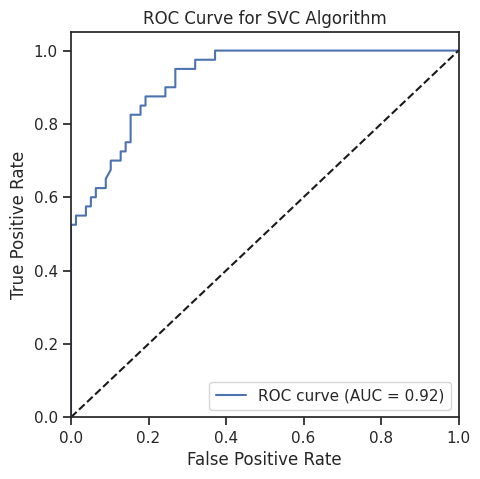

In [ ]:
y_score = svc_grid_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig=plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Algorithm')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-Curve_SVC.png', format='png', dpi=300)

# XGBOOST

Because of the error we received before "Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1. 2. 3.]"
we need to apply encoding on 'target' value.

**Source:** https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

That happens because the class column has to start from 0 (as required since version 1.3.2). An easy way to solve that is using LabelEncoder from sklearn.preprocssing library.

In [ ]:
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.fit_transform(y_test)

In [ ]:
xgb_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("xgb_clf",XGBClassifier(random_state=42))
    ])

In [ ]:
parameters={'xgb_clf__gamma':[1,5,10,20],
            'xgb_clf__max_depth':[3,6,9,15,20,25]
}
xgb_grid_pipeline=RandomizedSearchCV(xgb_pipeline, parameters,n_jobs=-1, cv=5, n_iter=100, refit='str',random_state=42)
#xgb_grid_pipeline=GridSearchCV(xgb_pipeline, parameters, cv=5)

In [ ]:
xgb_grid_pipeline.fit(X_train,y_train_xgb)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb_clf',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importan...
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=42, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb_clf__gamma': [1, 5, 10, 20],
                                        'xgb_clf__max_depth': [3, 6, 9, 15, 20,
                                                               25]},
                   random_state=42, refit='str')

In [ ]:
print("Grid Search Train Set Best Score: ", round(xgb_grid_pipeline.best_score_,2))

Grid Search Train Set Best Score:  0.83


In [ ]:
xgb_grid_pipeline.best_params_

{'xgb_clf__max_depth': 15, 'xgb_clf__gamma': 1}

In [ ]:
grid_predictions = xgb_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test_xgb, grid_predictions))
print(classification_report(y_test_xgb, grid_predictions))

[[72  6]
 [ 9 31]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        78
           1       0.84      0.78      0.81        40

    accuracy                           0.87       118
   macro avg       0.86      0.85      0.86       118
weighted avg       0.87      0.87      0.87       118



In [ ]:
print("AUC-ROC Test Score: ",round(roc_auc_score(y_test_xgb, xgb_grid_pipeline.predict_proba(X_test)[:,1], average='macro'),2))

AUC-ROC Test Score:  0.95


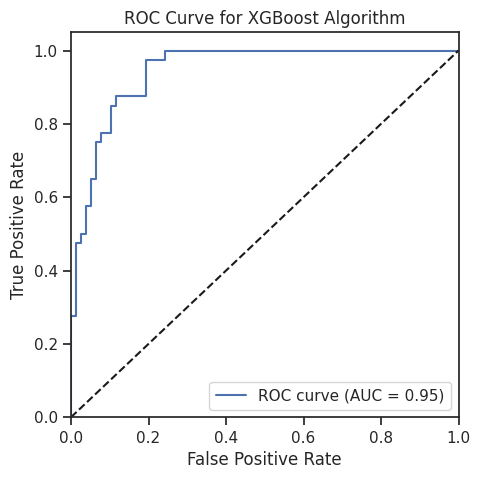

In [ ]:
y_score = xgb_grid_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig=plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Algorithm')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-Curve_XGBoost.png', format='png', dpi=300)

# Logistic Regression Classifier

In [ ]:
log_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("log_clf",LogisticRegression(random_state=42))
    ])

In [ ]:
parameters={'log_clf__C':[1,5,10,20,50,100],
            'log_clf__solver':('lbfgs', 'saga','liblinear','newton-cholesky'),
            'log_clf__max_iter':[50,100,200,300,500,750]}
log_grid_pipeline=RandomizedSearchCV(log_pipeline, parameters,n_jobs=-1, cv=5, n_iter=100, refit='str',random_state=42)
#randomforest_grid_pipeline=GridSearchCV(randomforest_pipeline, parameters, cv=5)
#include n_estimator to the gridsearch

In [ ]:
log_grid_pipeline.fit(X_smoted_train,y_smoted_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('log_clf',
                                              LogisticRegression(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'log_clf__C': [1, 5, 10, 20, 50, 100],
                                        'log_clf__max_iter': [50, 100, 200, 300,
                                                              500, 750],
                                        'log_clf__solver': ('lbfgs', 'saga',
                                                            'liblinear',
                                                            'newton-cholesky')},
                   random_state=42, refit='str')

In [ ]:
print("Grid Search Train Set Best Score: ", round(log_grid_pipeline.best_score_,2))

Grid Search Train Set Best Score:  0.84


In [ ]:
log_grid_pipeline.best_params_

{'log_clf__solver': 'saga', 'log_clf__max_iter': 750, 'log_clf__C': 50}

In [ ]:
grid_predictions = log_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[73  5]
 [14 26]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.88        78
         1.0       0.84      0.65      0.73        40

    accuracy                           0.84       118
   macro avg       0.84      0.79      0.81       118
weighted avg       0.84      0.84      0.83       118



In [ ]:
print("AUC-ROC Test Score: ",round(roc_auc_score(y_test, log_grid_pipeline.predict_proba(X_test)[:,1],  average='macro'),2))

AUC-ROC Test Score:  0.91


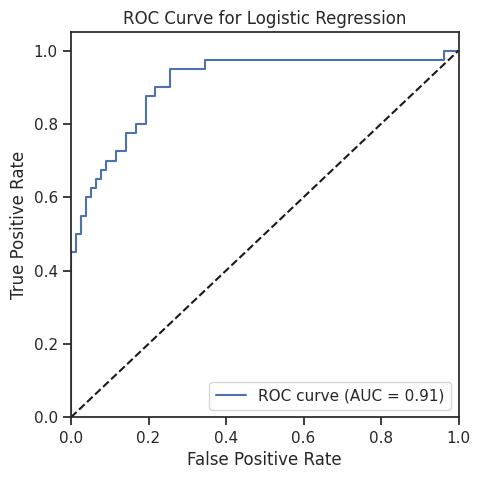

In [ ]:
y_score = log_grid_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig=plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-Curve_LogisticReg.png', format='png', dpi=300)

# MLP Classifier

In [ ]:
#For small datasets, ‘lbfgs’ can converge faster and perform better (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
mlp_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp_clf",MLPClassifier(random_state=42, solver='lbfgs'))
    ])

In [ ]:
parameters={'mlp_clf__hidden_layer_sizes':[1,2,3],
            'mlp_clf__activation':('relu', 'logistic'),
            'mlp_clf__max_iter':[50,100,200,300,500,750]}
mlp_grid_pipeline=RandomizedSearchCV(mlp_pipeline, parameters,n_jobs=-1, cv=5, n_iter=100, refit='str',random_state=42)
#randomforest_grid_pipeline=GridSearchCV(randomforest_pipeline, parameters, cv=5)
#include n_estimator to the gridsearch

In [ ]:
mlp_grid_pipeline.fit(X_smoted_train,y_smoted_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('mlp_clf',
                                              MLPClassifier(random_state=42,
                                                            solver='lbfgs'))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'mlp_clf__activation': ('relu',
                                                                'logistic'),
                                        'mlp_clf__hidden_layer_sizes': [1, 2,
                                                                        3],
                                        'mlp_clf__max_iter': [50, 100, 200, 300,
                                                              500, 750]},
                   random_state=42, refit='str')

In [ ]:
print("Grid Search Train Set Best Score: ", round(mlp_grid_pipeline.best_score_,2))

Grid Search Train Set Best Score:  0.85


In [ ]:
mlp_grid_pipeline.best_params_

{'mlp_clf__max_iter': 50,
 'mlp_clf__hidden_layer_sizes': 2,
 'mlp_clf__activation': 'logistic'}

In [ ]:
grid_predictions = mlp_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[63 15]
 [ 3 37]]
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88        78
         1.0       0.71      0.93      0.80        40

    accuracy                           0.85       118
   macro avg       0.83      0.87      0.84       118
weighted avg       0.87      0.85      0.85       118



In [ ]:
print("AUC-ROC Test Score: ",round(roc_auc_score(y_test, mlp_grid_pipeline.predict_proba(X_test)[:,1],  average='macro'),2))

AUC-ROC Test Score:  0.93


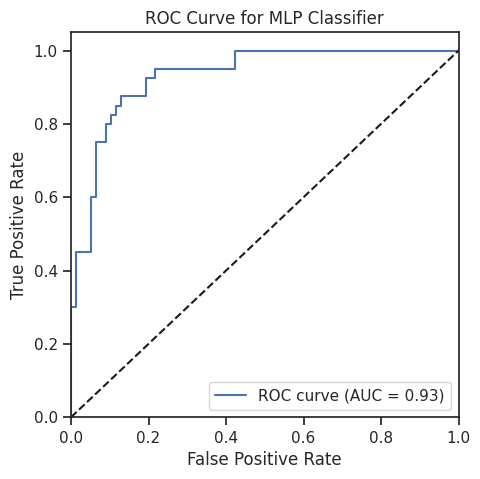

In [ ]:
y_score = mlp_grid_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig=plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dotted line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend(loc="lower right")
plt.show()

fig.savefig('ROC-Curve_MLP.png', format='png', dpi=300)

# New Approach For Stage Prediction

In [ ]:
work_data = imputed_data.copy()
features=["Age", "Sex","Stage","Plasma","Creatinine","LYVE1","REG1B","TFF1","age_bins","PDAC_target"]
work_data_features = work_data.loc[:,features]

In [ ]:
y_test_predictions = log_grid_pipeline.predict(X_test)

In [ ]:
y_test.values

array([1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
df_ytest_original = pd.DataFrame(data = y_test.values, columns=["Original_y"])

df_ytest_predictions = pd.DataFrame(data=y_test_predictions, columns = ["Predicted_y"])


In [ ]:
merged_testset = pd.concat([X_test.reset_index(drop=True), df_ytest_original.reset_index(drop=True),
                            df_ytest_predictions.reset_index(drop=True)], axis=1)
merged_testset.head()

,Plasma,Creatinine,LYVE1,REG1B,TFF1,Sex_F,Sex_M,age_bins_20-30,age_bins_31-40,age_bins_41-50,age_bins_51-60,age_bins_61-70,age_bins_71-80,age_bins_81-90,Original_y,Predicted_y
0,210.843264,0.46371,6.011376,150.056000,263.1630,0,1,0,0,0,0,0,0,1,1.0,1.0
1,123.367347,0.16965,1.319144,28.068943,102.4494,1,0,0,0,0,1,0,0,0,1.0,0.0
2,49.000000,0.74646,4.969500,59.362000,489.4650,0,1,0,0,0,1,0,0,0,0.0,0.0
3,1.000000,0.89349,0.003574,15.753000,459.4710,0,1,0,0,1,0,0,0,0,0.0,0.0
4,506.914116,1.02921,1.777817,465.267000,2962.8620,0,1,0,0,0,0,0,1,0,0.0,1.0


In [ ]:
print(X_test.shape)
print(df_ytest.shape)

(118, 14)
(118, 1)


# Aaron's Prediction

In [ ]:
'''
work_data = imputed_data.copy()
features=["Age", "Sex","Diagnosis","Stage","Plasma","Creatinine","LYVE1","REG1B","TFF1","age_bins"]
work_data_features = work_data.loc[:,features]
'''

In [ ]:
replacement_rules = {
    'I': ['I', 'IA', 'IB'],
    'II': ['II', 'IIA', 'IIB'],
    'III': ['III'],
    'IV': ['IV'],
    'OK': ['OK']
}

for new_value, old_values in replacement_rules.items():
    work_data_features.loc[data['Stage'].isin(old_values), 'Stage'] = new_value

In [ ]:
work_data_features["Stage"].value_counts()

OK     391
II      86
III     76
IV      21
I       16
Name: Stage, dtype: int64

In [ ]:
work_data_features.columns

Index(['Age', 'Sex', 'Stage', 'Plasma', 'Creatinine', 'LYVE1', 'REG1B', 'TFF1',
       'age_bins', 'PDAC_target'],
      dtype='object')

In [ ]:
y = work_data_features["Stage"]
X=work_data_features.drop(["Stage", "Age"], axis =1)

X_dummies = pd.get_dummies(X)
X_dummies.columns

print(X_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Plasma          590 non-null    float64
 1   Creatinine      590 non-null    float64
 2   LYVE1           590 non-null    float64
 3   REG1B           590 non-null    float64
 4   TFF1            590 non-null    float64
 5   PDAC_target     590 non-null    float64
 6   Sex_F           590 non-null    uint8  
 7   Sex_M           590 non-null    uint8  
 8   age_bins_20-30  590 non-null    uint8  
 9   age_bins_31-40  590 non-null    uint8  
 10  age_bins_41-50  590 non-null    uint8  
 11  age_bins_51-60  590 non-null    uint8  
 12  age_bins_61-70  590 non-null    uint8  
 13  age_bins_71-80  590 non-null    uint8  
 14  age_bins_81-90  590 non-null    uint8  
dtypes: float64(6), uint8(9)
memory usage: 33.0 KB
None


In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_dummies, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
oversample = SMOTE()
X_stagesmoted_train, y_stagesmoted_train = oversample.fit_resample(X_train_new, y_train_new)

print(X_smoted_train.shape)
print(y_smoted_train.shape)
print(X_test.shape)
print(y_test.shape)

(1565, 15)
(1565,)
(118, 14)
(118,)


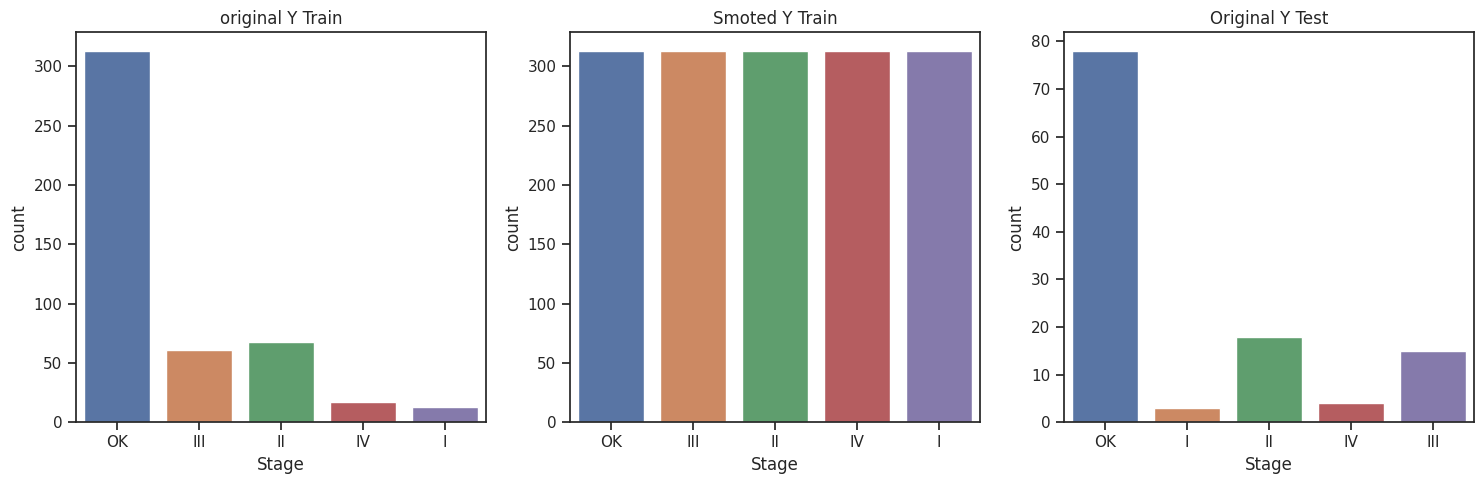

In [ ]:
df_y_train = pd.DataFrame(data=y_train_new, columns=['Stage'])
df_y_smoted_train = pd.DataFrame(data=y_stagesmoted_train, columns=['Stage'])
df_y_test = pd.DataFrame(data=y_test_new, columns=['Stage'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Stage', data=df_y_train, ax=axes[0])
axes[0].set_title('original Y Train')

# Draw the second countplot
sns.countplot(x='Stage', data=df_y_smoted_train, ax=axes[1])
axes[1].set_title('Smoted Y Train')

# Draw the third countplot
sns.countplot(x='Stage', data=df_y_test, ax=axes[2])
axes[2].set_title('Original Y Test')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the countplots
plt.show()

In [ ]:
dectree_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("dectree_clf",DecisionTreeClassifier())
    ])

parameters={'dectree_clf__min_samples_leaf':[10,20,50,150],
            'dectree_clf__criterion':('entropy', 'gini'),
            'dectree_clf__max_depth':[5,10,20,30,50,75]}

dectree_grid_pipeline=RandomizedSearchCV(dectree_pipeline, parameters,n_jobs=-1, cv=5, n_iter=100, refit='str',random_state=42)

dectree_grid_pipeline.fit(X_smoted_train,y_smoted_train)
print("Grid Search Train Set Best Score: ", round(dectree_grid_pipeline.best_score_,2))
print(dectree_grid_pipeline.best_params_)

grid_predictions = dectree_grid_pipeline.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

print("AUC-ROC Test Score: ",round(roc_auc_score(y_test, dectree_grid_pipeline.predict_proba(X_test), multi_class='ovr', average='macro'),2))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Grid Search Train Set Best Score:  0.69
{'dectree_clf__min_samples_leaf': 10, 'dectree_clf__max_depth': 50, 'dectree_clf__criterion': 'entropy'}
[[ 0  0  1  1  1]
 [ 3  5  2  5  3]
 [ 2  2  4  5  2]
 [ 0  1  2  1  0]
 [ 2  7 13  3 53]]
              precision    recall  f1-score   support

           I       0.00      0.00      0.00         3
          II       0.33      0.28      0.30        18
         III       0.18      0.27      0.22        15
          IV       0.07      0.25      0.11         4
          OK       0.90      0.68      0.77        78

    accuracy                           0.53       118
   macro avg       0.30      0.29      0.28       118
weighted avg       0.67      0.53      0.59       118

AUC-ROC Test Score:  0.64
